# 处理数据

In [1]:
import keras
import numpy as np
import pandas as pd
from keras.utils import np_utils
from keras.datasets import mnist
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Using TensorFlow backend.


In [2]:
#导入数据
(X_train_image, y_train_label), (X_test_image, y_test_label) = mnist.load_data()
y_train_label = y_train_label.reshape(60000, 1)
y_test_label = y_test_label.reshape(10000, 1)

11493376/11490434 [==============================] - 2s 0us/step


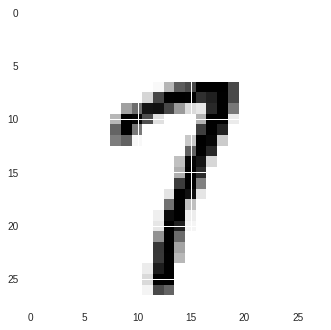

[7]


In [3]:
#显示一组数据
plt.imshow(X_test_image[666], cmap='binary')
plt.show()
print(y_test_label[666])

In [0]:
#显示一副多数据的图像
def img_show(beg, end):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if(end-beg>30):
        end = beg+29
    for num in range(beg,end+1):
        muti_img = plt.subplot(5, (end - beg) / 5 + 1, num-beg+1)
        title = "label="+str(y_test_label[num])
        plt.title(title)
        muti_img.imshow(X_test_image[num], cmap='binary')
    plt.show()

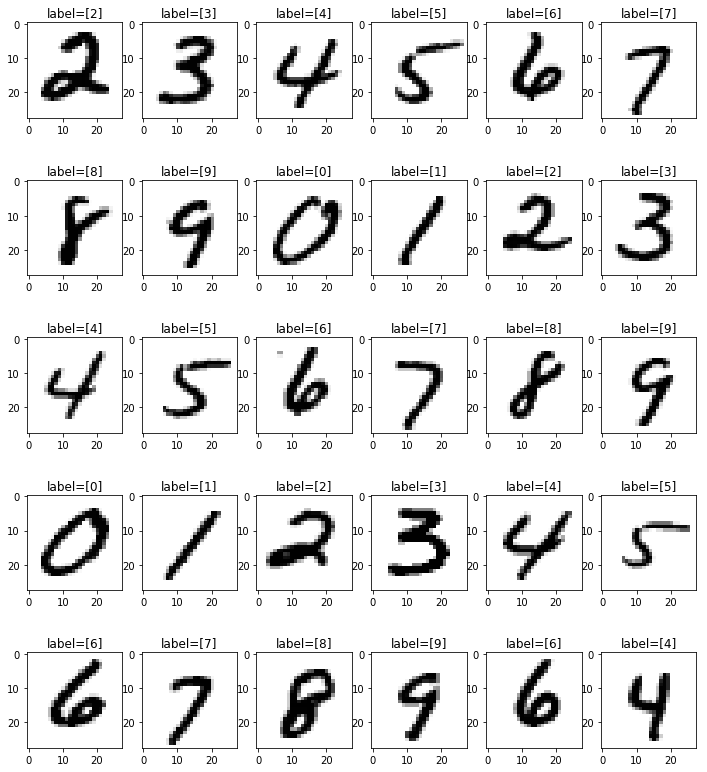

In [0]:
img_show(8800,8866)

In [0]:
#reshape二维->一维

X_train = X_train_image.reshape(60000,28*28)
X_test = X_test_image.reshape(10000,28*28)

In [5]:
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [0]:
print(X_test[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0 222 254 254 254
 254 241 198 198 198 198 198 198 198 198 170  52   

In [0]:
#标准化
X_train_normalize = X_train/255
X_test_normalize = X_test/255

In [0]:
print(X_test_normalize[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [0]:
#label->onehot
y_train_onehot = np_utils.to_categorical(y_train_label)
y_test_onehot = np_utils.to_categorical(y_test_label)

In [6]:
print(y_train_onehot[1000])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


# 训练模型

In [0]:
from keras.models import Sequential
from keras.layers import Dense

In [0]:
model = Sequential()

In [0]:
#构造网络结构
hidden_layer = Dense(units=256,input_dim=784,kernel_initializer='normal',activation="relu")
output_layer = Dense(units=10,kernel_initializer='normal',activation="softmax")

In [0]:
#搭建网络
model.add(hidden_layer)
model.add(output_layer)

In [0]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [0]:
train_history = model.fit(x = X_train_normalize,y = y_train_onehot, validation_split=0.2, epochs=19, batch_size=200, verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/19
 - 3s - loss: 0.0144 - acc: 0.9949 - val_loss: 0.1002 - val_acc: 0.9771
Epoch 2/19
 - 3s - loss: 0.0035 - acc: 0.9992 - val_loss: 0.0892 - val_acc: 0.9795
Epoch 3/19
 - 3s - loss: 0.0011 - acc: 0.9999 - val_loss: 0.0863 - val_acc: 0.9803
Epoch 4/19
 - 3s - loss: 6.2101e-04 - acc: 1.0000 - val_loss: 0.0860 - val_acc: 0.9806
Epoch 5/19
 - 3s - loss: 4.9884e-04 - acc: 1.0000 - val_loss: 0.0863 - val_acc: 0.9803
Epoch 6/19
 - 3s - loss: 4.3477e-04 - acc: 1.0000 - val_loss: 0.0870 - val_acc: 0.9801
Epoch 7/19
 - 3s - loss: 3.9631e-04 - acc: 1.0000 - val_loss: 0.0868 - val_acc: 0.9803
Epoch 8/19
 - 3s - loss: 3.5459e-04 - acc: 1.0000 - val_loss: 0.0878 - val_acc: 0.9803
Epoch 9/19
 - 3s - loss: 3.3341e-04 - acc: 1.0000 - val_loss: 0.0877 - val_acc: 0.9799
Epoch 10/19
 - 3s - loss: 2.9511e-04 - acc: 1.0000 - val_loss: 0.0885 - val_acc: 0.9804
Epoch 11/19
 - 3s - loss: 2.7898e-04 - acc: 1.0000 - val_loss: 0.0897 - val_acc: 0.9803
Epo

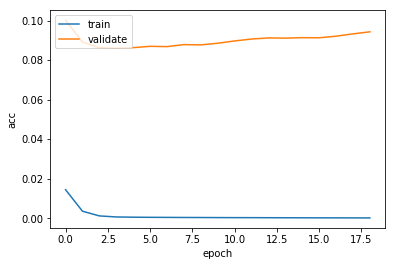

In [0]:
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend(['train', 'validate'],loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test_normalize,y_test_onehot)
print(scores[1])

10000/10000 [==============================] - 0s 36us/step
0.982


# 进行预测

In [0]:
prediction = model.predict_classes(X_test)

In [0]:
prediction[1]

2

In [0]:
def pre_img_show(beg, end):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if(end-beg>30):
        end = beg+29
    for num in range(beg,end+1):
        muti_img = plt.subplot(5, (end - beg) / 5 + 1, num-beg+1)
        title = "label="+str(prediction[num])+","+str(y_test_label[num])
        plt.title(title)
        muti_img.imshow(X_test_image[num], cmap='binary')
    plt.show()

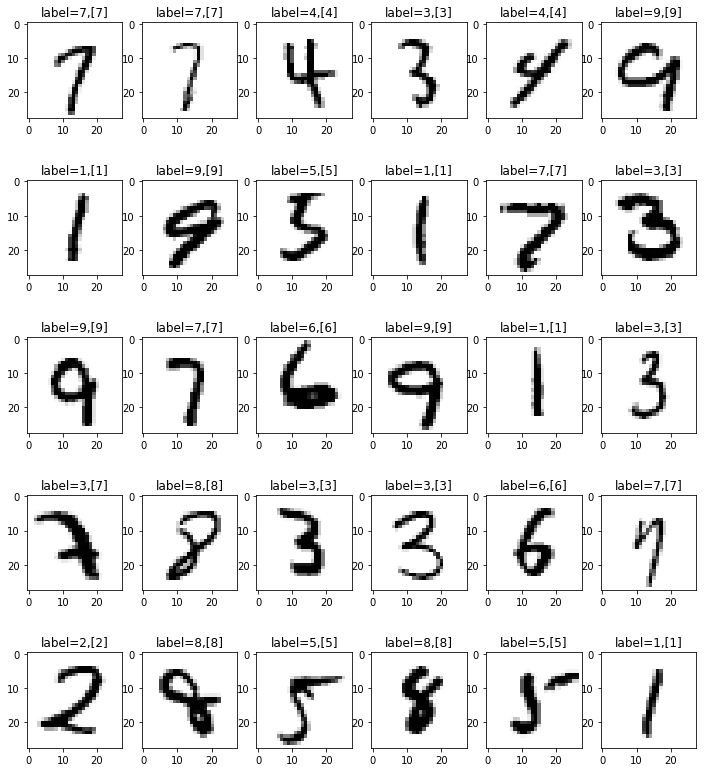

In [0]:
pre_img_show(666, 700)

# 显示混淆矩阵

In [0]:
import pandas as pd

In [0]:
#建立混淆矩阵
pd.crosstab(y_test_label.reshape(10000,),prediction,rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,970,0,0,1,1,2,2,1,2,1
1,0,1125,4,1,0,1,2,1,1,0
2,3,2,1011,3,2,0,2,6,3,0
3,1,0,1,995,0,3,0,3,3,4
4,2,1,2,1,959,0,4,1,0,12
5,2,0,0,15,1,863,3,1,3,4
6,5,2,0,1,3,3,944,0,0,0
7,0,4,8,1,0,0,0,1009,1,5
8,3,0,4,13,2,1,3,3,943,2


In [0]:
#建立真实值与测试值的dataFrame
df = pd.DataFrame({'label':y_test_label.reshape(10000,),'prediction':prediction})

In [0]:
#输出0-20
df[:20]

,label,prediction
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,5
9,9,9


In [0]:
#输出真实值是5，但预测值是3的数据
df[(df.label==5)&(df.prediction==3)]

,label,prediction
340,5,3
1003,5,3
1393,5,3
1670,5,3
2035,5,3
2597,5,3
2810,5,3
4271,5,3
4360,5,3
5937,5,3


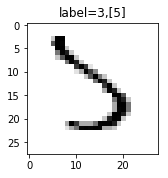

In [0]:
pre_img_show(1393, 1393)

# 解决overfitting问题(使用Dropout功能)

In [0]:
from keras.layers import Dropout
from keras.layers import Dense
from keras.models import Sequential

In [0]:
model = Sequential()

In [0]:
#定义模型
hidden_layer = Dense(units=256,input_dim=784,kernel_initializer='normal',activation="relu")
drop_layer = Dropout(0.5)
output_layer = Dense(units=10,kernel_initializer='normal',activation='softmax')

In [0]:
model.add(hidden_layer)
model.add(drop_layer)
model.add(output_layer)

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [12]:
train_history = model.fit(x = X_train_normalize,y = y_train_onehot, validation_split=0.2, epochs=18, batch_size=200, verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/18
 - 3s - loss: 0.5419 - acc: 0.8442 - val_loss: 0.2346 - val_acc: 0.9361
Epoch 2/18
 - 2s - loss: 0.2541 - acc: 0.9267 - val_loss: 0.1695 - val_acc: 0.9538
Epoch 3/18
 - 2s - loss: 0.1980 - acc: 0.9427 - val_loss: 0.1407 - val_acc: 0.9591
Epoch 4/18
 - 2s - loss: 0.1673 - acc: 0.9512 - val_loss: 0.1215 - val_acc: 0.9648
Epoch 5/18
 - 2s - loss: 0.1448 - acc: 0.9573 - val_loss: 0.1087 - val_acc: 0.9670
Epoch 6/18
 - 2s - loss: 0.1286 - acc: 0.9622 - val_loss: 0.1000 - val_acc: 0.9694
Epoch 7/18
 - 2s - loss: 0.1146 - acc: 0.9659 - val_loss: 0.0936 - val_acc: 0.9718
Epoch 8/18
 - 2s - loss: 0.1045 - acc: 0.9680 - val_loss: 0.0867 - val_acc: 0.9735
Epoch 9/18
 - 2s - loss: 0.0987 - acc: 0.9702 - val_loss: 0.0843 - val_acc: 0.9754
Epoch 10/18
 - 2s - loss: 0.0887 - acc: 0.9730 - val_loss: 0.0829 - val_acc: 0.9750
Epoch 11/18
 - 2s - loss: 0.0830 - acc: 0.9755 - val_loss: 0.0792 - val_acc: 0.9763
Epoch 12/18
 - 2s - loss: 0.0773 - 

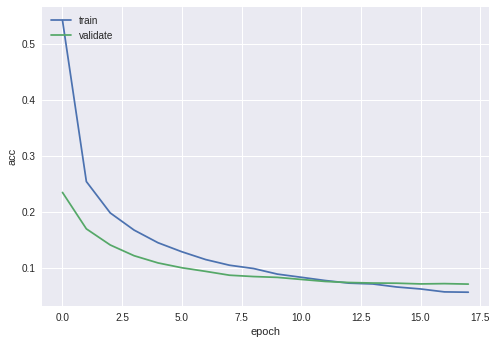

In [13]:
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend(['train', 'validate'],loc='upper left')
plt.show()

In [14]:
scores = model.evaluate(X_test_normalize,y_test_onehot)
print(scores[1])

10000/10000 [==============================] - 1s 63us/step
0.98


# 保存与下载模型

In [0]:
model.save('my_model.h5') 

In [0]:
from google.colab import files
files.download("my_model.h5")